In [615]:
import numpy as np
import pandas as pd

import json
import csv

import datetime
import matplotlib.pyplot as plt

In [616]:
filenames = ['ECE219_tweet_data/tweets_#gohawks.txt',
            'ECE219_tweet_data/tweets_#gopatriots.txt',
            'ECE219_tweet_data/tweets_#nfl.txt',
            'ECE219_tweet_data/tweets_#patriots.txt',
            'ECE219_tweet_data/tweets_#sb49.txt',
            'ECE219_tweet_data/tweets_#superbowl.txt'
            ]

output_filenames = ['Q1_2#gohawks.lol',
                    'Q1_2#gopatriots.lol',
                   'Q1_2#nfl.lol',
                   'Q1_2#patriots.lol',
                   'Q1_2#sb49.lol',
                   'Q1_2#superbowl.lol']

for i in range(len(filenames)):
    pst_tz = pytz.timezone('US/Pacific')
    
    with open(filenames[i], 'r') as reader:
        headers = [
                   'citation_date',
#                    'citation_date_pst',
                   'date',
                   'hour',
                   'author_nick_names',
                   'tweets',
                   'retweets',
                   'followers',
                   'followers_max'
                  ]
        with open(output_filenames[i], 'w') as writer:
            csv_writer = csv.writer(writer, lineterminator='\n')
            csv_writer.writerow(headers)
            for line in reader:
                data = json.loads(line)
                response =  [
#                             datetime.datetime.fromtimestamp(data['citation_date']),
                            datetime.datetime.fromtimestamp(data['citation_date'], pst_tz),
                            datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).strftime('%Y%m%d'),
                            datetime.datetime.fromtimestamp(data['citation_date'], pst_tz).hour,
                            data['author']['nick'],
                            1, # there is one tweet at a time..
                            data['metrics']['citations']['total'], #retweets
                            data['author']['followers'], #followers
                            data['author']['followers'], #followers
                             ]
                csv_writer.writerow(response)


In [617]:
# QUESTION 1: Report the following statistics for each hashtag:
#  Average number of tweets per hour
#  Average number of followers of users posting the tweets per tweet (to make it simple, we
# average over the number of tweets; if a users posted twice, we count the user and the user's
# followers twice as well)
#  Average number of retweets per tweet

In [618]:
gohawks = pd.read_csv('Q1_2#gohawks.lol',delimiter=',', parse_dates=['citation_date'])
gopatriots = pd.read_csv('Q1_2#gopatriots.lol',delimiter=',', parse_dates=['citation_date'])
nfl = pd.read_csv('Q1_2#nfl.lol',delimiter=',', parse_dates=['citation_date'])
patriots = pd.read_csv('Q1_2#patriots.lol',delimiter=',', parse_dates=['citation_date'])
sb49 = pd.read_csv('Q1_2#sb49.lol',delimiter=',', parse_dates=['citation_date'])
superbowl = pd.read_csv('Q1_2#superbowl.lol',delimiter=',', parse_dates=['citation_date'])

In [619]:
full_df = pd.concat([gohawks, gopatriots, nfl, patriots, sb49, superbowl])

In [620]:
def get_basic_statistics(dataframe):
    max = dataframe.max()
    min = dataframe.min()
    avg_tweets_per_hour = dataframe['tweets'].sum() / ((max['citation_date'] - min['citation_date']).total_seconds() / 60 / 60)
    print('Average tweets per hour:',avg_tweets_per_hour)
    
    avg_followers_posting_tweets = dataframe['followers'].sum() / dataframe['tweets'].sum()
    print('Average number of users posting tweets per tweet:', avg_followers_posting_tweets)
    
    avg_retweet_per_tweet = dataframe['retweets'].sum() / dataframe['tweets'].sum()
    print('Average number of retweet per tweet:', avg_followers_per_tweet)

In [621]:
# go hawks
print('GoHawks')
get_basic_statistics(gohawks)

GoHawks
Average tweets per hour: 292.4878506217368
Average number of users posting tweets per tweet: 2217.9237355281984
Average number of retweet per tweet: 2.2309229822313545


In [622]:
#go patriots
print('GoPatriots')
get_basic_statistics(gopatriots)

GoPatriots
Average tweets per hour: 40.95469800606194
Average number of users posting tweets per tweet: 1427.2526051635405
Average number of retweet per tweet: 2.2309229822313545


In [623]:
print('NFL')
get_basic_statistics(nfl)

NFL
Average tweets per hour: 397.0213901819841
Average number of users posting tweets per tweet: 4662.37544523693
Average number of retweet per tweet: 2.2309229822313545


In [624]:
print('Patriots')
get_basic_statistics(patriots)

Patriots
Average tweets per hour: 750.89426460689
Average number of users posting tweets per tweet: 3280.4635616550277
Average number of retweet per tweet: 2.2309229822313545


In [625]:
print('Sb49')
get_basic_statistics(sb49)

Sb49
Average tweets per hour: 1276.857059868047
Average number of users posting tweets per tweet: 10374.160292019487
Average number of retweet per tweet: 2.2309229822313545


In [626]:
print('Superbowl')
get_basic_statistics(superbowl)

Superbowl
Average tweets per hour: 2072.1184017040796
Average number of users posting tweets per tweet: 8814.96799424623
Average number of retweet per tweet: 2.2309229822313545


In [627]:
# QUESTION 2: Plot "number of tweets in hour" over time for #SuperBowl and #NFL (a histogram
# with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named
# as tweet [#hashtag].txt.

In [628]:
max = nfl.max()
min = nfl.min()

In [629]:
nfl['time_hour'] = nfl.citation_date.apply(lambda x: round((x - min['citation_date']).total_seconds()/60/60))

In [630]:
superbowl['time_hour'] = superbowl.citation_date.apply(lambda x: round((x - min['citation_date']).total_seconds()/60/60))

In [631]:
nfl.head()

,citation_date,date,hour,author_nick_names,tweets,retweets,followers,followers_max,time_hour
0,2015-01-17 17:59:06,20150117,9,ibrake4flowers,1,4,41.0,41.0,82
1,2015-01-14 18:08:26,20150114,10,tmswithmro,1,2,361.0,361.0,10
2,2015-01-17 18:17:43,20150117,10,rainbowkirk,1,2,6.0,6.0,82
3,2015-01-16 03:58:05,20150115,19,gary4freedom,1,2,1364.0,1364.0,44
4,2015-01-14 17:44:31,20150114,9,eddieedmundo,1,14,580.0,580.0,10


In [632]:
superbowl.head()

,citation_date,date,hour,author_nick_names,tweets,retweets,followers,followers_max,time_hour
0,2015-01-17 04:21:37,20150116,20,beccadelgado67,1,2,22.0,22.0,68
1,2015-01-17 04:06:19,20150116,20,beccadelgado67,1,15,22.0,22.0,68
2,2015-01-14 20:22:37,20150114,12,waltskelliepic,1,2,858.0,858.0,12
3,2015-01-14 18:48:18,20150114,10,eventmarketer,1,2,14335.0,14335.0,11
4,2015-01-15 10:00:31,20150115,2,cqr111,1,7,1143.0,1143.0,26


In [633]:
nfl_time_hour = nfl.groupby('time_hour').sum()

In [634]:
x = list(nfl_time_hour.index)
y = list(nfl_time_hour.tweets)

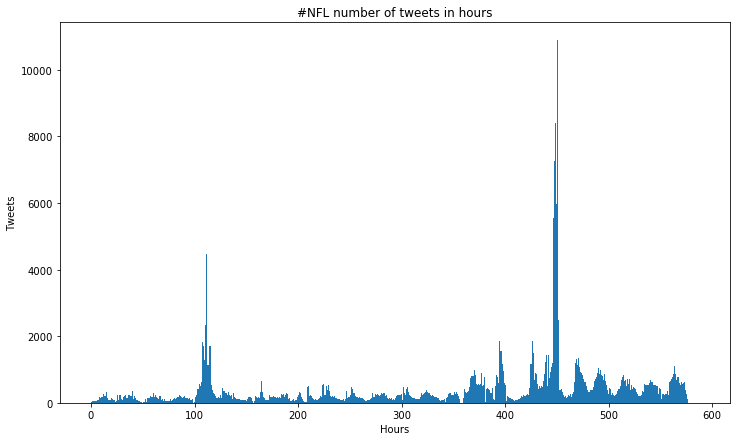

In [635]:
plt.figure(figsize=(12,7))
plt.bar(x, y, width=x[1]-x[0])
plt.xlabel('Hours')
plt.ylabel('Tweets')
plt.title('#NFL number of tweets in hours')
plt.show()

In [636]:
superbowl_time_hour = superbowl.groupby('time_hour').sum()
superbowl_time_hour_x = list(superbowl_time_hour.index)
superbowl_time_hour_y = list(superbowl_time_hour.tweets)

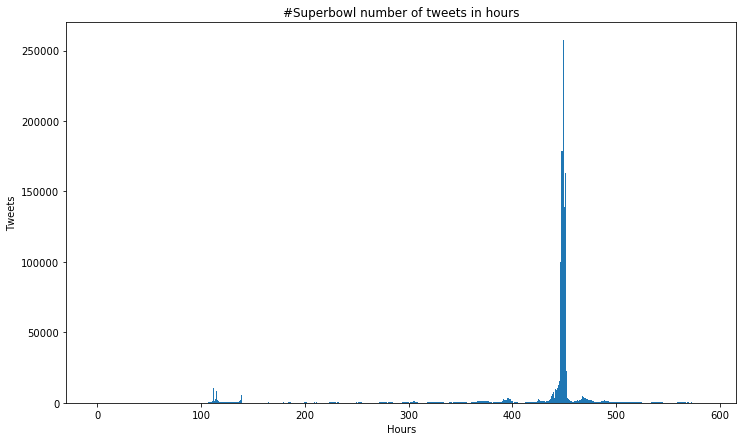

In [637]:
plt.figure(figsize=(12,7))
plt.bar(superbowl_time_hour_x, superbowl_time_hour_y, width=x[1]-x[0])
plt.xlabel('Hours')
plt.ylabel('Tweets')
plt.title('#Superbowl number of tweets in hours')
plt.show()

In [638]:
# QUESTION 3: For each of your models, report your model's Mean Squared Error (MSE) and
# R-squared measure. Also, analyse the significance of each feature using the t-test and p-value. You
# may use the OLS in the libarary statsmodels in Python.

In [639]:
from statsmodels.regression.linear_model import RegressionResults
import pytz
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [640]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [641]:
gohawks.head()

,citation_date,date,hour,author_nick_names,tweets,retweets,followers,followers_max
0,2015-01-17 18:19:38,20150117,10,rejinseattle,1,5,1752.0,1752.0
1,2015-01-14 18:18:56,20150114,10,emq4444,1,2,258.0,258.0
2,2015-01-17 04:21:59,20150116,20,beccadelgado67,1,5,22.0,22.0
3,2015-01-17 04:21:37,20150116,20,beccadelgado67,1,2,22.0,22.0
4,2015-01-17 04:18:56,20150116,20,beccadelgado67,1,2,22.0,22.0


In [644]:
gohawks_agg = gohawks.groupby(['date','hour']).agg(
    {'hour' : np.max,
     'tweets' : np.sum,
     'retweets' : np.sum,
     'followers' : np.sum,
     'followers_max': np.max
    })




In [645]:
gohawks_agg.head()

hour  tweets  retweets  followers  followers_max
date     hour                                                  
20150114 0        0      29       459    23814.0        12922.0
         1        1      13        32     7774.0         2592.0
         2        2      14       378    26891.0        11886.0
         3        3       9        28    19094.0        11886.0
         4        4      24        62    31949.0         9772.0

In [646]:
# http://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

In [651]:
model = ols("tweets ~  retweets + followers + followers_max", data=gohawks_agg).fit()

In [653]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tweets   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.395e+29
Date:                Sun, 27 May 2018   Prob (F-statistic):               0.00
Time:                        21:28:31   Log-Likelihood:                 12859.
No. Observations:                 570   AIC:                        -2.571e+04
Df Residuals:                     565   BIC:                        -2.569e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.512e-11   1.74e-12     20.130

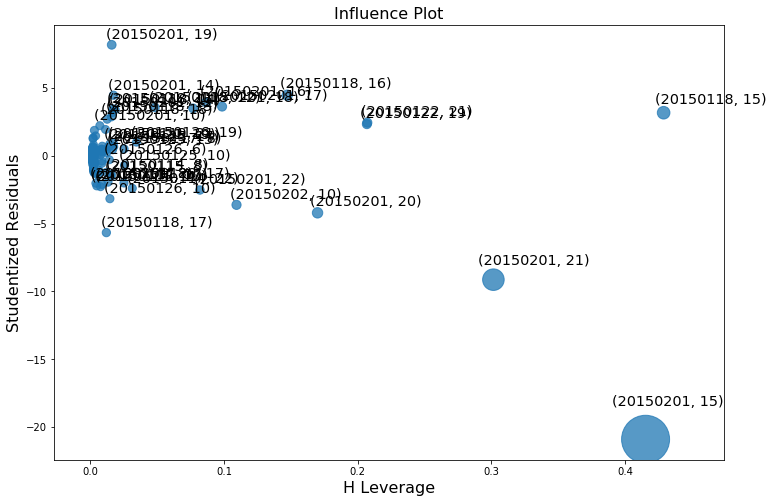

In [649]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.show()

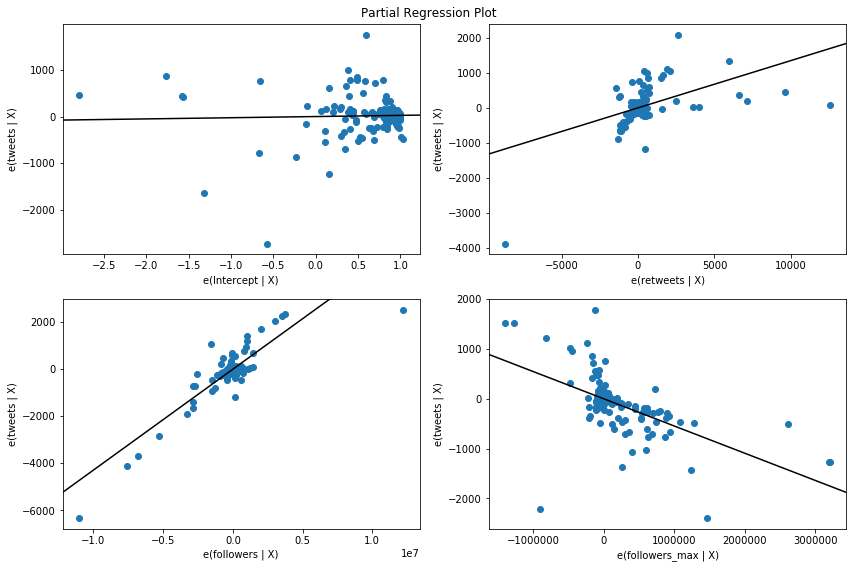

In [650]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()